Общая информация о наборе данных

- ID: идентификатор записи
- Customer_ID: идентификатор клиента
- Name: Имя клиента
- Month: месяц, для которого представлена информация
- Age: Возраст клиента
- SSN: номер карты социального страхования
- Occupation: род деятельности клиента
- Annual_Income: годовой доход
- Monthly_Inhand_Salary: месячная зарплата
- Num_Bank_Accounts: количество банковских счетов клиента
- Num_Credit_Card: количество кредитных карт
- Interest_Rate: процентная ставка по кредитной карте
- Num_of_Loan: количество кредитов, взятых в банке
- Type_of_Loan: типы кредитов, взятых клиентом
- Delay_from_due_date: среднее количество дней задержки от даты платежа
- Num_of_delayed_Payment: средний платеж, задержанный клиентом
- Changed_Credit_Limit: процентное изменение лимита кредитной карты
- Num_Credit_Inquiries: количество запросов по кредитной карте
- Credit_Mix: классификация структуры кредитов
- Outstanding_Debt: оставшаяся задолженность, которую необходимо погасить
- Credit_Utilization_Ratio: коэффициент использования кредитной карты
- Credit_History_Age: продолжительность кредитной истории клиента
- Payment_of_Min_Amount: выплачивал ли человек только минимальную сумму
- Total_EMI_per_month: ежемесячные платежи EMI
- Amount_invested_monthly: ежемесячная сумма, инвестированная клиентом
- Payment_Behaviour: платежное поведение клиента
- Monthly_Balance: ежемесячная сумма баланса клиента
- Credit_Score: кредитная оценка клиента

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/work/Банк.csv',
                 low_memory = False)
pd.set_option('display.max_columns', None)

In [ ]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [3]:
df.dtypes[df.dtypes == 'object']

ID                         object
Customer_ID                object
Month                      object
Name                       object
Age                        object
SSN                        object
Occupation                 object
Annual_Income              object
Num_of_Loan                object
Type_of_Loan               object
Num_of_Delayed_Payment     object
Changed_Credit_Limit       object
Credit_Mix                 object
Outstanding_Debt           object
Credit_History_Age         object
Payment_of_Min_Amount      object
Amount_invested_monthly    object
Payment_Behaviour          object
Monthly_Balance            object
Credit_Score               object
dtype: object

Признаки, которые должны быть количественными.

In [4]:
Features = ['Age', 'Annual_Income', 'Num_of_Loan',
            'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
            'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']

In [5]:
for feature in Features:
    uniques = df[feature].unique()
    print('Признак:', '\n', 'Тип данных:',
          df[feature].dtype, '\n', feature,
          '\n', uniques, '\n', '--'*40, '\n')

Признак: 
 Тип данных: object 
 Age 
 ['23' '-500' '28_' ... '4808_' '2263' '1342'] 
 -------------------------------------------------------------------------------- 

Признак: 
 Тип данных: object 
 Annual_Income 
 ['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_'] 
 -------------------------------------------------------------------------------- 

Признак: 
 Тип данных: object 
 Num_of_Loan 
 ['4' '1' '3' '967' '-100' '0' '0_' '2' '3_' '2_' '7' '5' '5_' '6' '8' '8_'
 '9' '9_' '4_' '7_' '1_' '1464' '6_' '622' '352' '472' '1017' '945' '146'
 '563' '341' '444' '720' '1485' '49' '737' '1106' '466' '728' '313' '843'
 '597_' '617' '119' '663' '640' '92_' '1019' '501' '1302' '39' '716' '848'
 '931' '1214' '186' '424' '1001' '1110' '1152' '457' '1433' '1187' '52'
 '1480' '1047' '1035' '1347_' '33' '193' '699' '329' '1451' '484' '132'
 '649' '995' '545' '684' '1135' '1094' '1204' '654' '58' '348' '614'
 '1363' '323' '1406' '1348' '430' '153' '1461' '905' '1312' '1424' 

Задание 1.

Удалить не числовые символы в этих признаках.

In [6]:
for feature in Features:
    df[feature] = df[feature].replace('[^\d.]', '', regex=True)

Задание 2. Преобразовать формат признаков в числовой.

In [7]:
for feature in Features:
    df[feature] = pd.to_numeric(df[feature], errors='coerce')

Задание 3.

Определить наличие дубликатов и удалить повторяющиеся записи.

In [8]:
# Check for duplicates
duplicate_rows = df.duplicated()

# Remove duplicates
df = df[~duplicate_rows]

Задание 4.

Выявить в значениях качественных признаков ошибочные записи и заменить их на неопределенные значения `nan`.

In [9]:
CatFeatures = ['ID',
 'Customer_ID',
 'Month',
 'Name',
 'Age',
 'SSN',
 'Occupation',
 'Annual_Income',
 'Num_of_Loan',
 'Type_of_Loan',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'Credit_Score']

Выявление ошибочных записей.

In [10]:
for feature in CatFeatures:
    # Replace non-alphabetic characters with NaN
    df[feature] = df[feature].replace('[^a-zA-Z]', np.nan, regex=True)

# Check altered data
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,NaN,NaN,January,NaN,23,NaN,Scientist,19114.12,1824.843333,3,4,3,4,NaN,3,7.0,11.27,4.0,NaN,809.98,26.822620,NaN,No,49.574949,80.415295,NaN,312.494089,Good
1,NaN,NaN,February,NaN,23,NaN,Scientist,19114.12,NaN,3,4,3,4,NaN,-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,NaN,284.629162,Good
2,NaN,NaN,March,NaN,500,NaN,Scientist,19114.12,NaN,3,4,3,4,NaN,3,7.0,NaN,4.0,Good,809.98,28.609352,NaN,No,49.574949,81.699521,NaN,331.209863,Good
3,NaN,NaN,April,NaN,23,NaN,Scientist,19114.12,NaN,3,4,3,4,NaN,5,4.0,6.27,4.0,Good,809.98,31.377862,NaN,No,49.574949,199.458074,NaN,223.451310,Good
4,NaN,NaN,May,NaN,23,NaN,Scientist,19114.12,1824.843333,3,4,3,4,NaN,6,NaN,11.27,4.0,Good,809.98,24.797347,NaN,No,49.574949,41.420153,NaN,341.489231,Good


Задание 5.

Заменить пропущенные значения в признаках "SSN", "Occupation", "Payment_Behaviour", "Credit_Mix" на групповые моды.

In [13]:
from tqdm import tqdm

# List of features to be filling
features_to_fill = ["SSN", "Occupation", "Payment_Behaviour", "Credit_Mix"]

# First, we need to make sure there are no NaN values in 'Customer_ID'
df['Customer_ID'].fillna('Unknown', inplace=True)

for feature in tqdm(features_to_fill):
    # Grouping by 'Customer_ID' and retrieving mode per group
    group_modes = df.groupby('Customer_ID')[feature].apply(lambda x: x.mode().dropna().values[0] if not x.mode().dropna().empty else np.nan)
    # Filling NaNs wit mode per group
    df = df.set_index('Customer_ID').apply(lambda x: x.fillna(group_modes[x.name] if x.name in group_modes else np.nan), axis=1).reset_index()

100%|██████████| 4/4 [02:37<00:00, 39.48s/it]


Задание 6.

Выявить наличие аномальных значений в признаке "Age".

<AxesSubplot: >

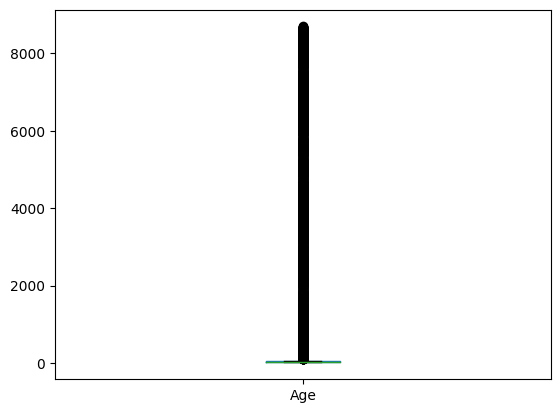

In [14]:
# Checking for outlier values in "Age" feature 
df['Age'].plot(kind='box')

Заменить значения признака "Age" менее 19 и более 75 неопределенными значениями `nan`.

In [15]:
df.loc[(df['Age'] < 19) | (df['Age'] > 75), 'Age'] = np.nan

Задание 7.

Заменить пропущенные значения в признаке "Age" групповыми медианами. В качестве группирующего признака использовать "Customer_ID".

In [16]:
group_medians = df.groupby('Customer_ID')['Age'].median()
df = df.set_index('Customer_ID').apply(lambda x: x.fillna(group_medians[x.name] if x.name in group_medians else np.nan), axis=1).reset_index()


Задание 8.

Проверить наличие пропущенных значений в признаке "Age". При их наличии заменить пропуски случайными значениями из интервала $m\pm s$. Использовать метод `random.randint` библиотеки `numpy`.


In [18]:
import numpy as np

# Check for null values
null_count = df['Age'].isnull().sum()

# If null values are present, replace them
if null_count > 0:
    age_mean = df['Age'].mean()
    age_std = df['Age'].std()
    lower_bound = np.max([age_mean - age_std, df['Age'].min()])
    upper_bound = np.min([age_mean + age_std, df['Age'].max()])
    random_values = np.random.randint(lower_bound, upper_bound, size=null_count)
    df.loc[df['Age'].isnull(), 'Age'] = random_values


Задание 9.

Построить диаграмму `boxplot` и на ее основе оценить наличие выбросов в признаке "Age".

Определить процент записей, в которых пропущенны значения признака "Age".

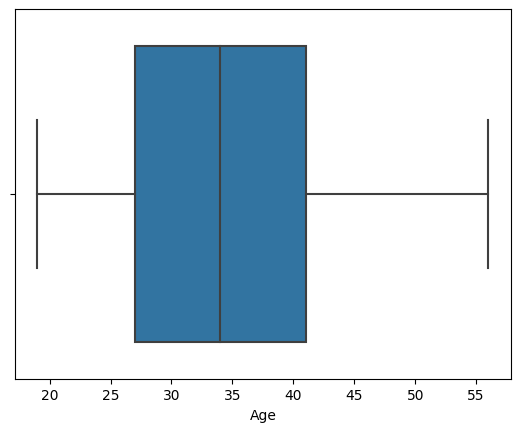

Percentage of missing values in "Age": 0.0%


In [19]:
import seaborn as sns

# Plotting boxplot for 'Age' feature
sns.boxplot(x=df['Age'])
plt.show()

# Calculating and printing the percentage of missing values in 'Age'
missing_age_percentage = df['Age'].isnull().mean() * 100
print(f'Percentage of missing values in "Age": {missing_age_percentage}%')

Задание 10.

По описанной выше схеме реализовать обработку аномальных значений в признаках "Monthly_Inhand_Salary", "Annual_ Income" и "Num_Bank_Accounts".

Processing Monthly_Inhand_Salary:


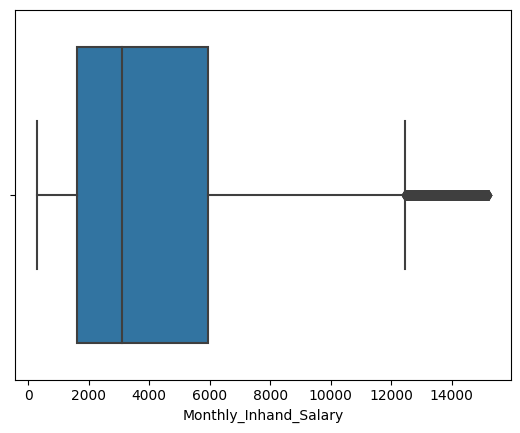

Percentage of missing values in "Monthly_Inhand_Salary": 0.0%
---

Processing Annual_Income:


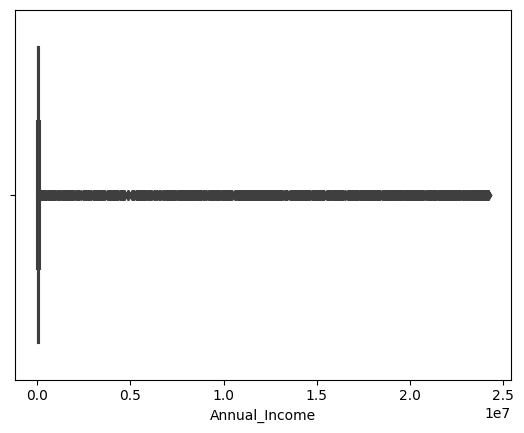

Percentage of missing values in "Annual_Income": 0.0%
---

Processing Num_Bank_Accounts:


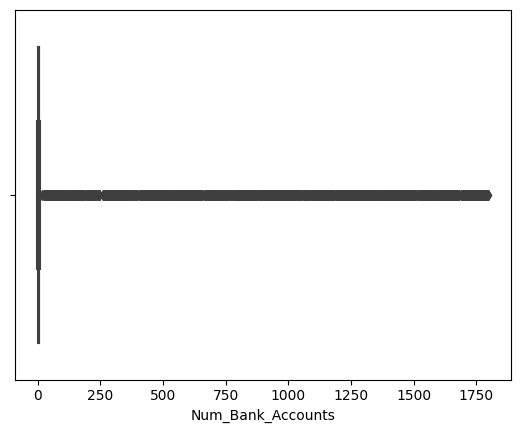

Percentage of missing values in "Num_Bank_Accounts": 0.0%
---



In [22]:
features_to_process = ["Monthly_Inhand_Salary", "Annual_Income", "Num_Bank_Accounts"]

for feature in features_to_process:
    print(f'Processing {feature}:')

    # Correcting dtype of features before processing
    df[feature] = pd.to_numeric(df[feature], errors='coerce')
    
    # Plotting boxplot for the feature
    if df[feature].dtype in ('int64', 'float64'):
        sns.boxplot(x=df[feature])
        plt.show()
    else:
        print("Boxplot can't be plotted for non-numeric data.")

    # Replacing outliers with NaN
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df.loc[(df[feature] < lower_bound) | (df[feature] > upper_bound), feature] = np.nan

    # Filling missing values with random sampling
    missing_count = df[feature].isnull().sum()
    if missing_count > 0:
        feature_mean = df[feature].mean()
        feature_std = df[feature].std()
        feature_lower_bound = np.max([feature_mean - feature_std, df[feature].min()])
        feature_upper_bound = np.min([feature_mean + feature_std, df[feature].max()])
        random_values = np.random.randint(feature_lower_bound, feature_upper_bound, size=missing_count)
        df.loc[df[feature].isnull(), feature] = random_values

    # Calculating and printing the percentage of missing values
    missing_percentage = df[feature].isnull().mean() * 100
    print(f'Percentage of missing values in \"{feature}\": {missing_percentage}%\n---\n')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2c241afa-1646-4314-aebf-23d9389451a1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>